## Parameter Setup

Let's define our Standard Model and SMEFT parameters:

In [1]:
import numpy as np
from HiggsMass import TLHiggsMassSq, OneLoopHiggsMassSq, HiggsSelfEnergy
from matplotlib import pyplot as plt

# quiet some warnings about logs of negative numbers and square roots of negative numbers
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", message="invalid value encountered in log")
warnings.filterwarnings("ignore", message="Using the parameter 'delta' is deprecated. Please use 'gamma' instead. Support for using 'delta' will be removed in the future.")
warnings.filterwarnings("ignore", message="Casting complex values to real discards the imaginary part")
warnings.filterwarnings("ignore", message="invalid value encountered in sqrt")
warnings.filterwarnings("ignore", message="Casting complex values to real discards the imaginary part")
warnings.filterwarnings("ignore", message="invalid value encountered in scalar power")


In [2]:
# Standard Model parameters
lam_SM = 0.13 # Higgs self-coupling (typical SM value)
ScaleMu = 125.0  # Renormalization scale in GeV

# SMEFT Wilson coefficients (start with SM values = 0)
cH_SM = 0.0
cHbox_SM = 0.0
cHDD_SM = 0.0

# Calculate tree-level and one-loop masses for SM
mH_tree_SM = np.sqrt(TLHiggsMassSq(lam_SM, cH_SM, cHbox_SM, cHDD_SM, ScaleMu))
mH_oneloop_SM = np.sqrt(OneLoopHiggsMassSq(lam_SM, cH_SM, cHbox_SM, cHDD_SM, ScaleMu))

print(f"Standard Model Results:")
print(f"Tree-level Higgs mass: {mH_tree_SM:.2f} GeV")
print(f"One-loop Higgs mass: {mH_oneloop_SM:.2f} GeV")
print(f"One-loop correction: {mH_oneloop_SM - mH_tree_SM:.2f} GeV")

# Calculate self-energy
self_energy = HiggsSelfEnergy(lam_SM, cH_SM, cHbox_SM, cHDD_SM, ScaleMu)
print(f"\nSelf-energy correction: {-self_energy.imag:.2e} GeV²")

Standard Model Results:
Tree-level Higgs mass: 125.55 GeV
One-loop Higgs mass: 125.09 GeV
One-loop correction: -0.46 GeV

Self-energy correction: -1.15e+02 GeV²


## Theoretical Background

### Tree-Level Higgs Mass

At tree level, the Higgs mass squared is given by:
$$m_H^2 = 2\lambda v^2$$

In the presence of SMEFT operators, this gets modified to:
$$m_H^2 = 2\lambda v^2 \left(1 + \text{SMEFT corrections}\right)$$

### One-Loop Corrections

The one-loop corrected mass includes the self-energy contribution:
$$m_H^2(\text{1-loop}) = m_H^2(\text{tree}) - \text{Im}[\Sigma_H(p^2)]$$

where $\Sigma_H(p^2)$ is the Higgs self-energy function.

### SMEFT Modifications

The SMEFT operators modify both the tree-level mass and the loop corrections through the Wilson coefficients $c_H$, $c_{H\Box}$, and $c_{HDD}$.

## Dependence on Higgs Self-Coupling λ of SM part

Let's examine how the Higgs mass varies with the self-coupling parameter λ:

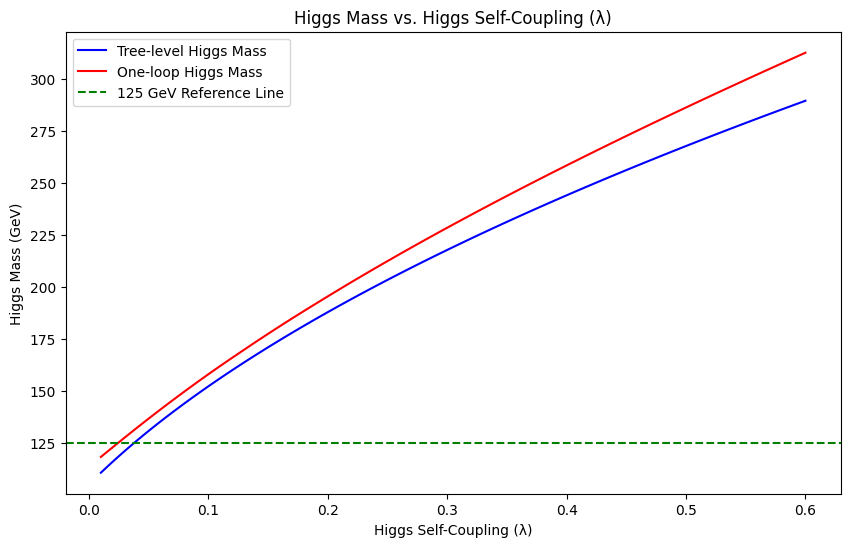

In [ ]:
cH = -1e-6  
cHbox = 0.0  
cHDD = 0.0  

lam_range = np.linspace(0.01, 0.6, 100)
# Calculate Higgs masses for varying lambda
mH_tree = [np.sqrt(TLHiggsMassSq(lam, cH, cHbox, cHDD, ScaleMu)) for lam in lam_range]
mH_oneloop = [np.sqrt(OneLoopHiggsMassSq(lam, cH, cHbox, cHDD, ScaleMu)) for lam in lam_range]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lam_range, mH_tree, label='Tree-level Higgs Mass', color='blue')
plt.plot(lam_range, mH_oneloop, label='One-loop Higgs Mass', color='red')
# 125 GeV line for reference
plt.axhline(y=125.0, color='green', linestyle='--', label='125 GeV Reference Line')
plt.title('Higgs Mass vs. Higgs Self-Coupling (λ)')
plt.xlabel('Higgs Self-Coupling (λ)')
plt.ylabel('Higgs Mass (GeV)')
plt.legend()
plt.show()



